In [1]:
import joint_defs
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2
%matplotlib inline
plt.style.use(['science', 'ieee', 'no-latex'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times


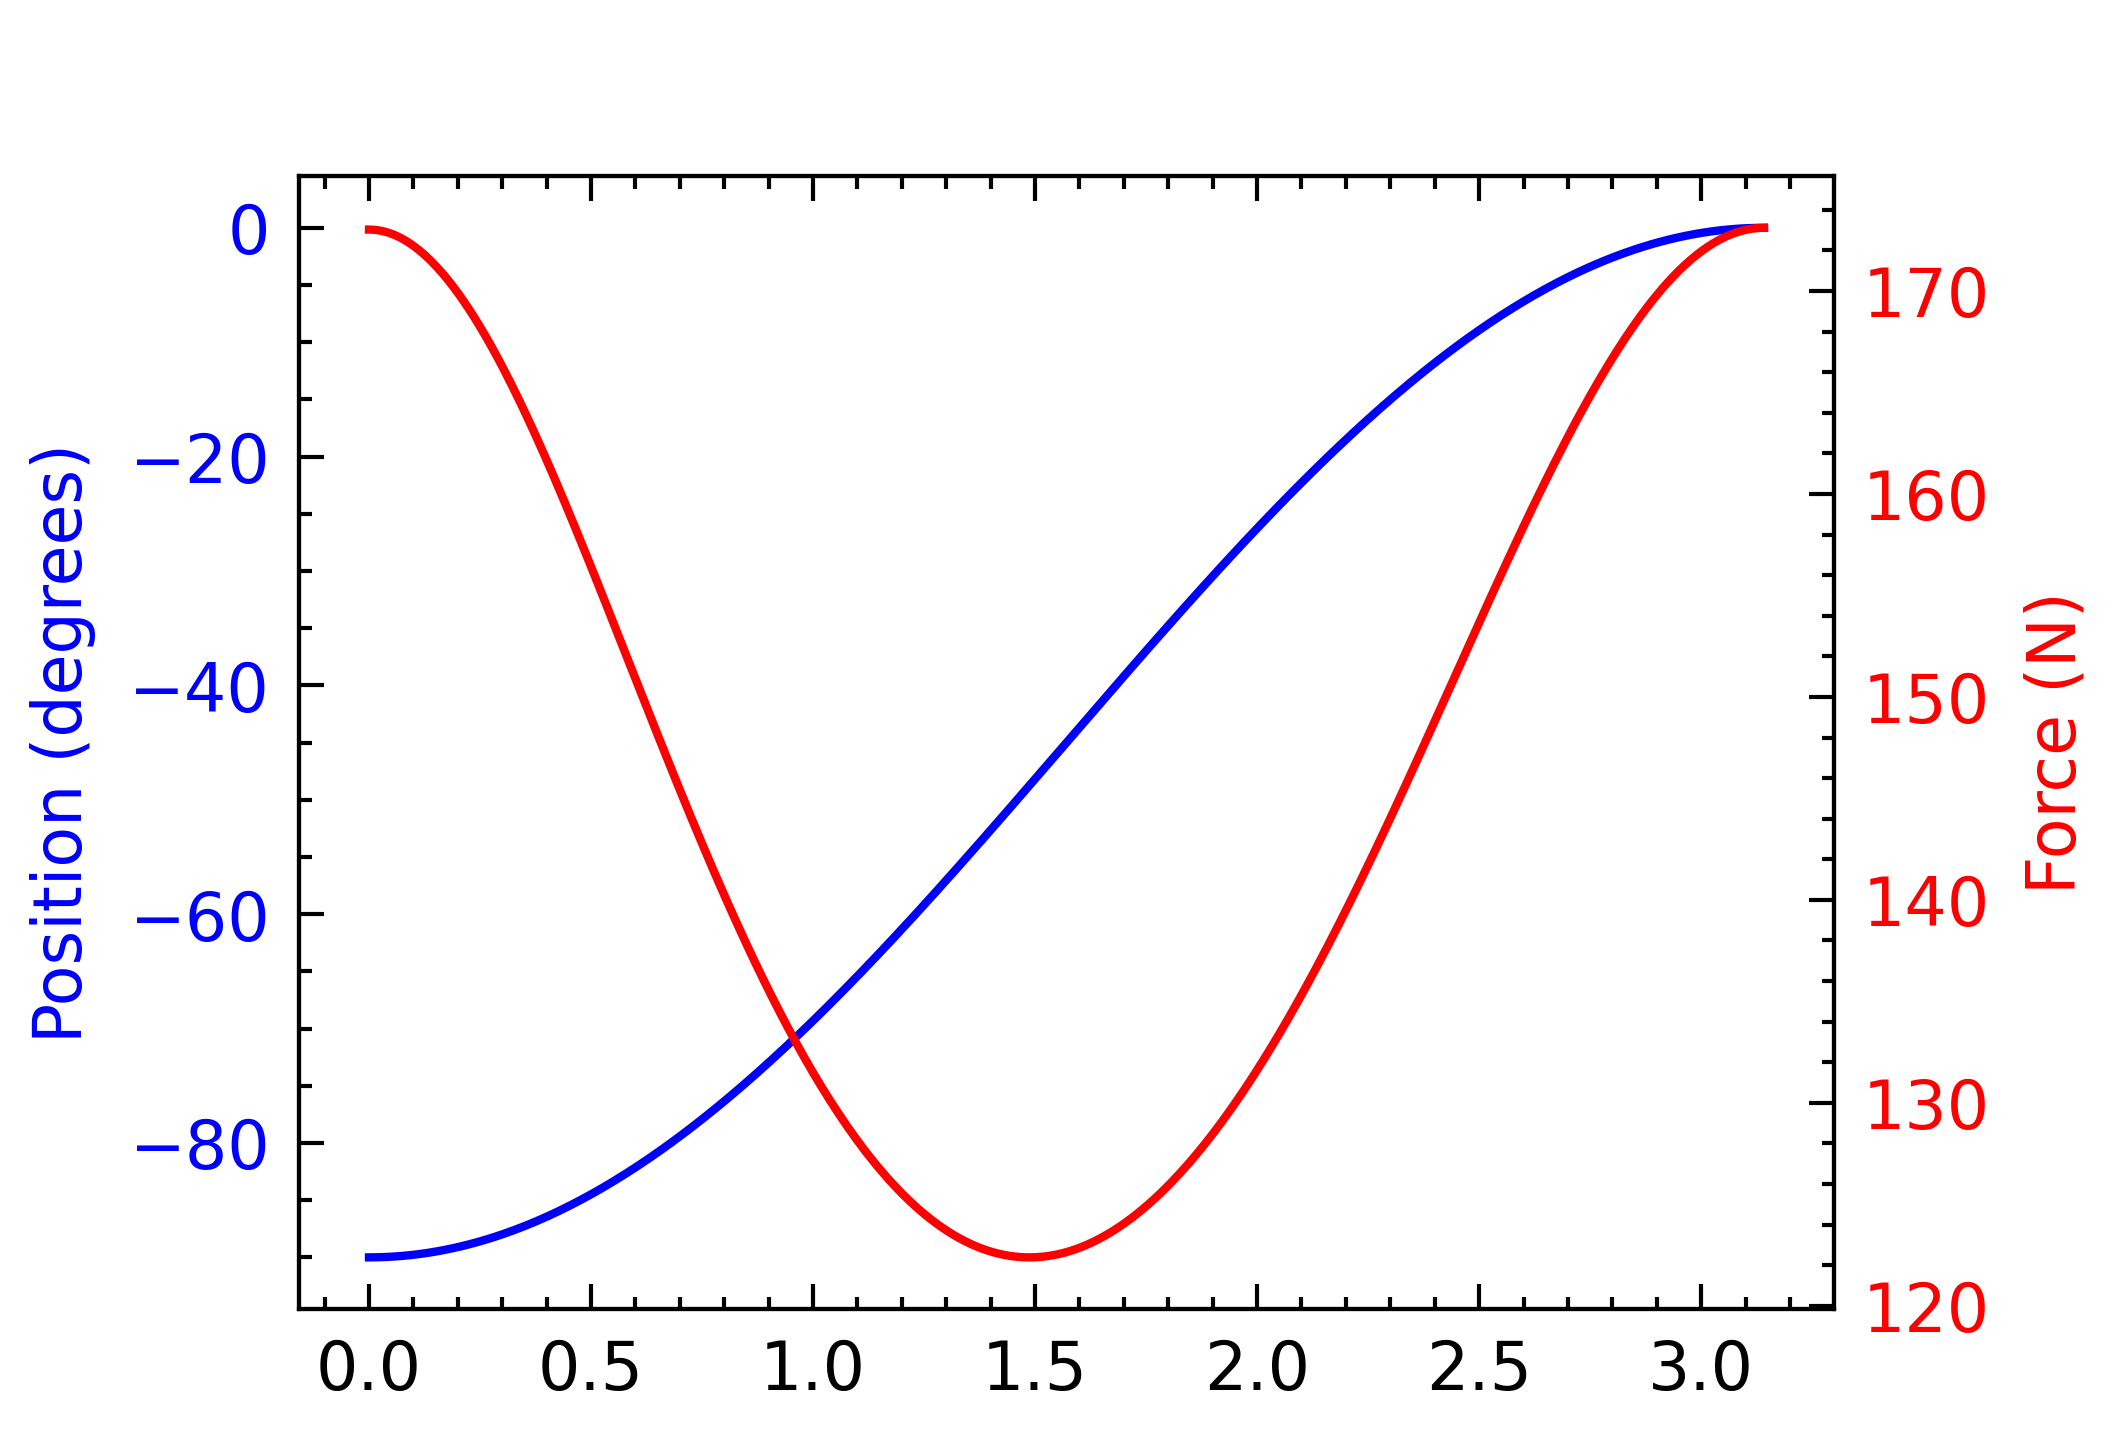

In [2]:
knee = joint_defs.RL4_KNE_PIT

t = np.linspace(0, np.pi, num=500)
w = 1
angles = np.radians(-90) * 0.5 * (np.cos(w*t) + 1)
torques = [-10] * len(t)
# torques = 10 * 0.5 * (np.cos(w*t) + 1)
forces = []
for angle, torque in zip(angles, torques):
    knee.angles = knee.dof * np.array([angle] * 3)
    knee.torques = knee.dof * np.array([torque] * 3)
    forces.append(knee.torque_to_force())

fig, ax1 = plt.subplots()
ax2 = plt.twinx()
ax1.plot(t, np.degrees(angles), color='b', )
ax1.set_ylabel('Position (degrees)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax2.plot(t, forces, color='r')
ax2.set_ylabel('Force (N)', color='r')
ax2.tick_params(axis='y', labelcolor='r')
fig.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


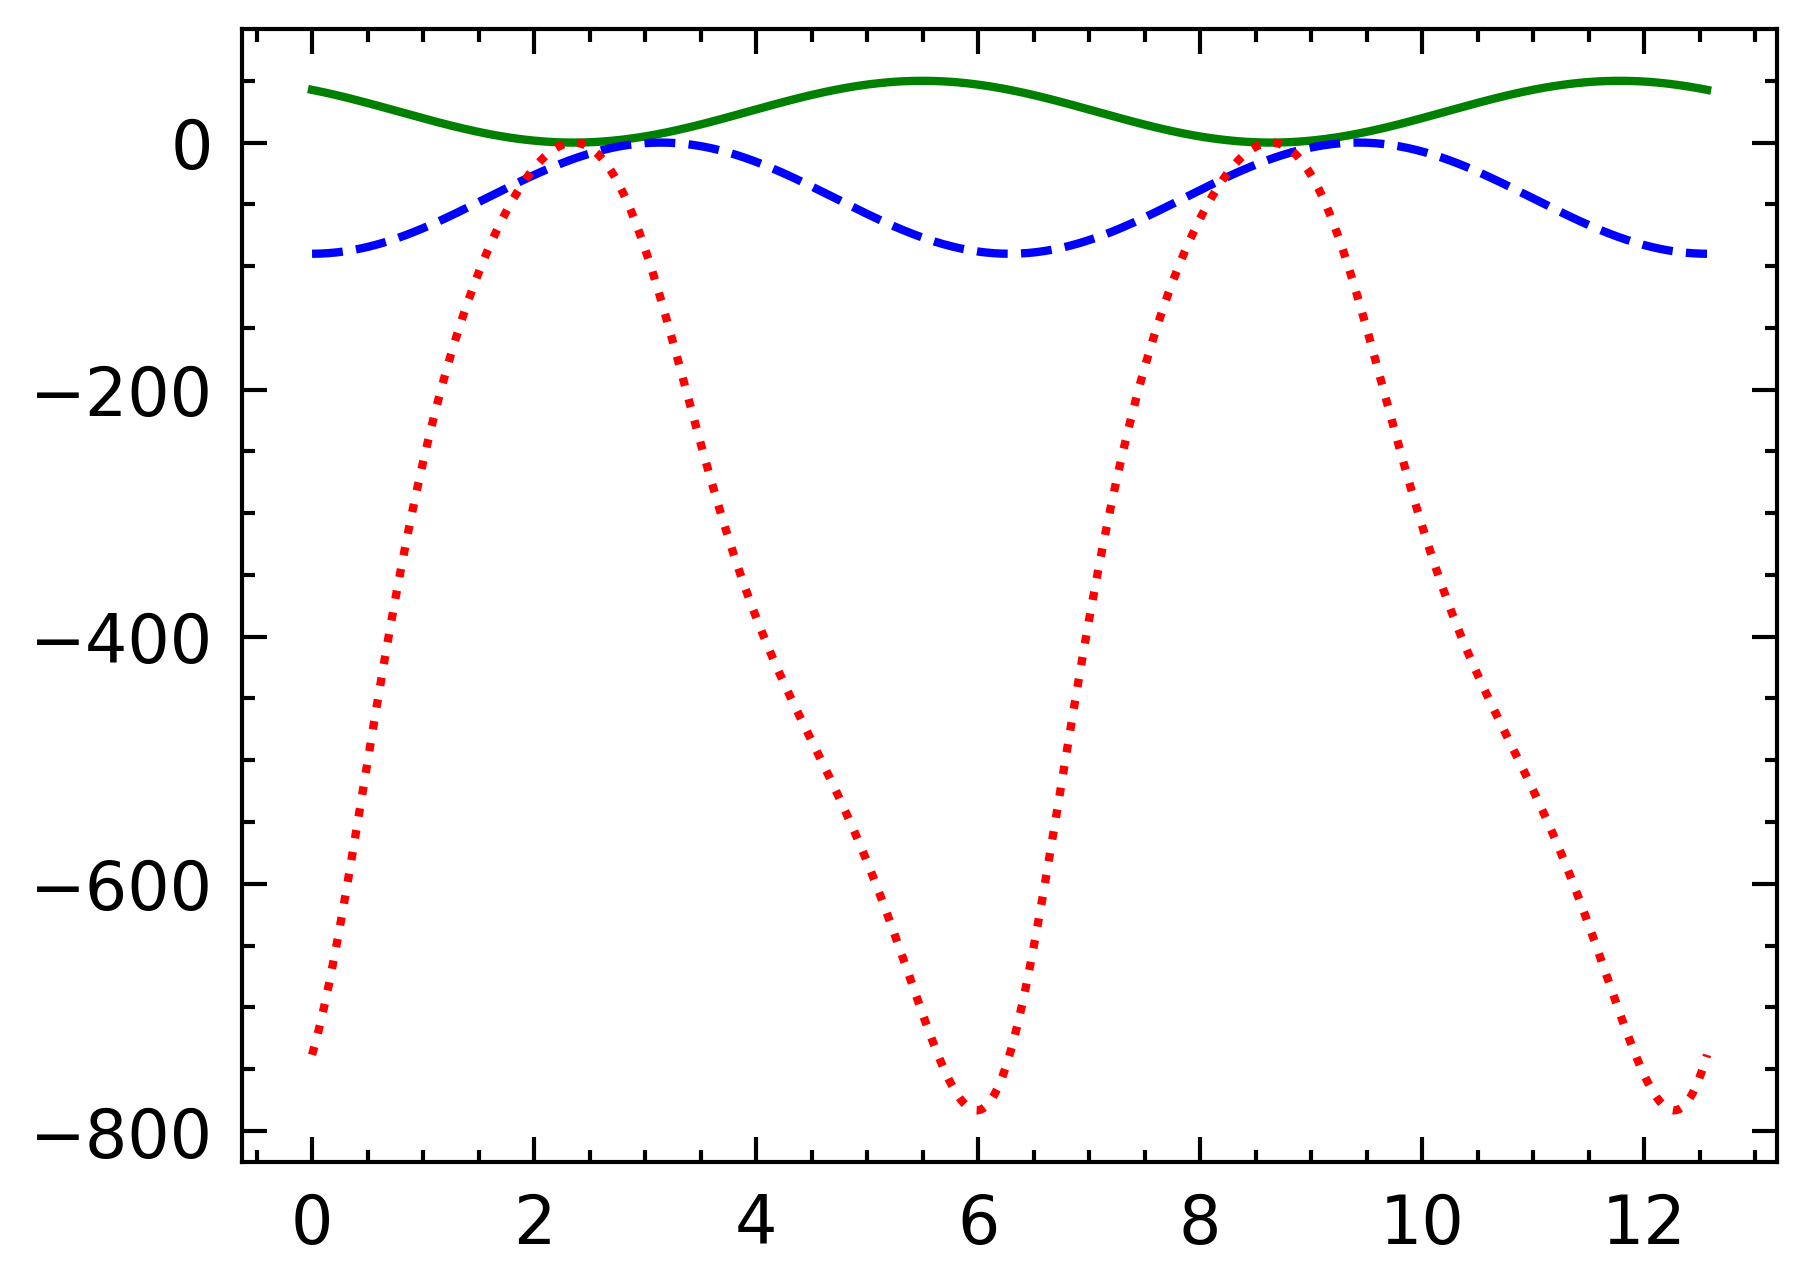

In [3]:
knee = joint_defs.RL4_KNE_PIT

w = 1
t = np.linspace(0, 4*np.pi, num=500)
angles = np.radians(-90) * 0.5 * (np.cos(w*t) + 1)
torques = 50 * 0.5 * (np.cos(w*t + np.pi / 4) + 1)
forces = []
for angle, torque in zip(angles, torques):
    knee.angles = knee.dof * np.array([angle] * 3)
    knee.torques = knee.dof * np.array([torque] * 3)
    forces.append(knee.torque_to_force())

plt.plot(t, torques, color='g', label='Torque (Nm)')
plt.plot(t, np.degrees(angles), color='b', label='Position (degrees)')
plt.plot(t, forces, color='r', label='Force (N)')
fig.legend()
plt.show()

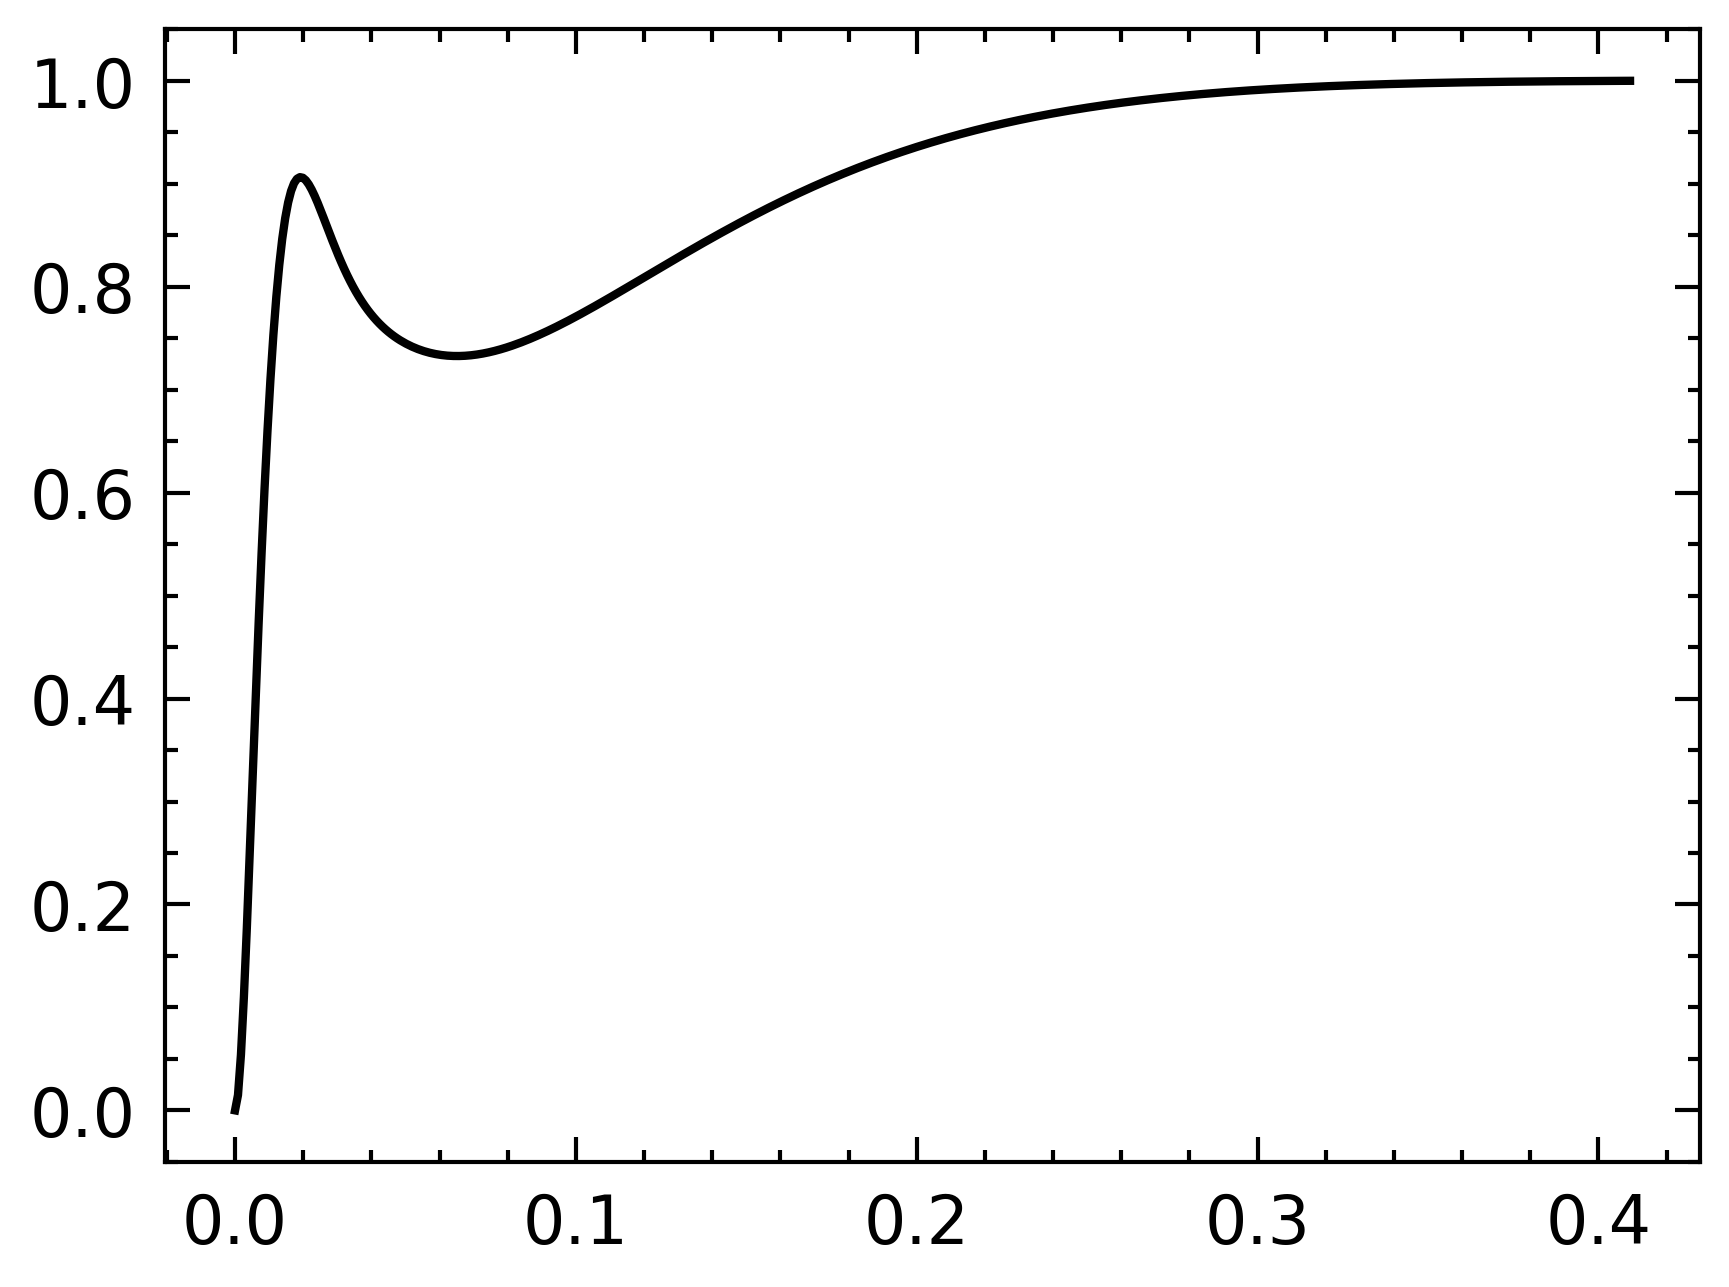

In [10]:
from control.matlab import step
import control as ctl


def pid(Kp, Ki, Kd, Tf):
    s = ctl.TransferFunction.s
    z = ctl.TransferFunction.z
    return Kp + Ki/s + (Kd*s)/(Tf*s+1)

kff = 226.6/1000
eta = 0.27
w_n = 7.08*2*np.pi

Plant = kff*ctl.tf(w_n**2,[1, 2*eta*w_n, w_n**2])

# targets:
PO = 0.1
ts = 0.2


## build pid controller
Kp = 5.76
Ki = 100.4
Kd = 0.279

# Kp = 30
# Ki = 2
# Kd = 0.25

Tf = 0.00304
C = pid(Kp, Ki, Kd, Tf)

cl_Plant = ctl.feedback(C*Plant,1)

# t, y = ctl.input_output_response(ctl.tf2io(cl_Plant), np.linspace(0, 0.5), )
y, t = step(cl_Plant)
plt.plot(t, y)